<a href="https://colab.research.google.com/github/Ankita123SL/Airbnb-analysis/blob/main/Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>



1. Neighbourhood groups with highest count among all.
2. Availability of rooms in different areas.
3. Analysis of various rooms type in different areas.
4. Neighbourhood group analysis based on Latitude and Longitude.
5. Price Exploration in neighbourhood group and neighbourhood
6. Price variation based on neighbourhood group and availability_365.
7. Relation between neighbourhood group and Availability of number of days for room.
8. Number of Property owned by each neighbourhood groups.
9. Different rooms distribution based on neighbourhood groups.
10. Correlation among different data sets(columns).
11. Which hosts are the busiest and why?
12. What can we learn from predictions? (ex: locations, prices, reviews, etc)
13. Is there any noticeable difference of traffic among different areas and what could be the reason for it?
14. What can we learn about different hosts and areas?




## <b> Explore and analyze the data to discover key understandings (not limited to these) such as :
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# Why we need Airbnb Booking analysis ?

Airbnb, is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities.

Airbnb makes money by charging guests and hosts for short-term rental stays in private homes or apartments booked through the Airbnb website.The short-term rental business has seen good growth in the past decade.

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world.  Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.



# Analysis of some queries related to Airbnb Bookings

In [2]:
import pandas as pd
import numpy as np
import ast


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
file_path = '/content/drive/MyDrive/Airbnb NYC 2019.csv'
df = pd.read_csv(file_path)

In [9]:
# prompt: Neighbourhood groups with highest count among all.

df['neighbourhood_group'].value_counts().reset_index()


,neighbourhood_group,count
0,Manhattan,21661
1,Brooklyn,20104
2,Queens,5666
3,Bronx,1091
4,Staten Island,373


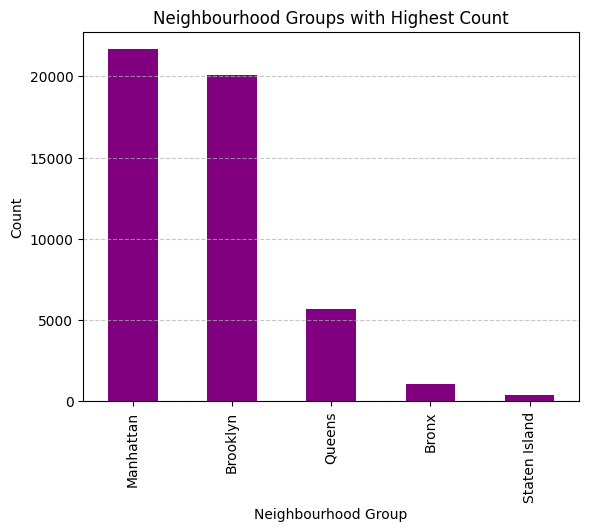

In [15]:
import matplotlib.pyplot as plt

# Calculate value counts before plotting
ng = df['neighbourhood_group'].value_counts()

# Plot the bar chart with the corrected argument 'palette'
ng.plot(kind='bar',color='purple')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.title('Neighbourhood Groups with Highest Count')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.show()

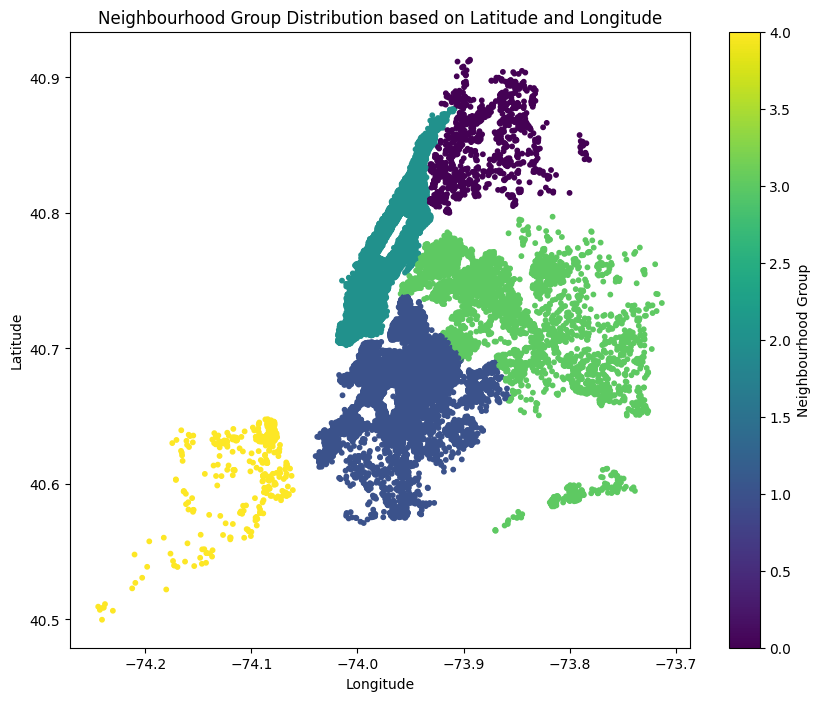

In [18]:


import matplotlib.pyplot as plt
# Scatter plot of latitude and longitude, colored by neighborhood group
plt.figure(figsize=(10, 8))
plt.scatter(df['longitude'], df['latitude'], c=df['neighbourhood_group'].astype('category').cat.codes, cmap='viridis', s=10)
plt.colorbar(label='Neighbourhood Group')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Neighbourhood Group Distribution based on Latitude and Longitude')
plt.show()


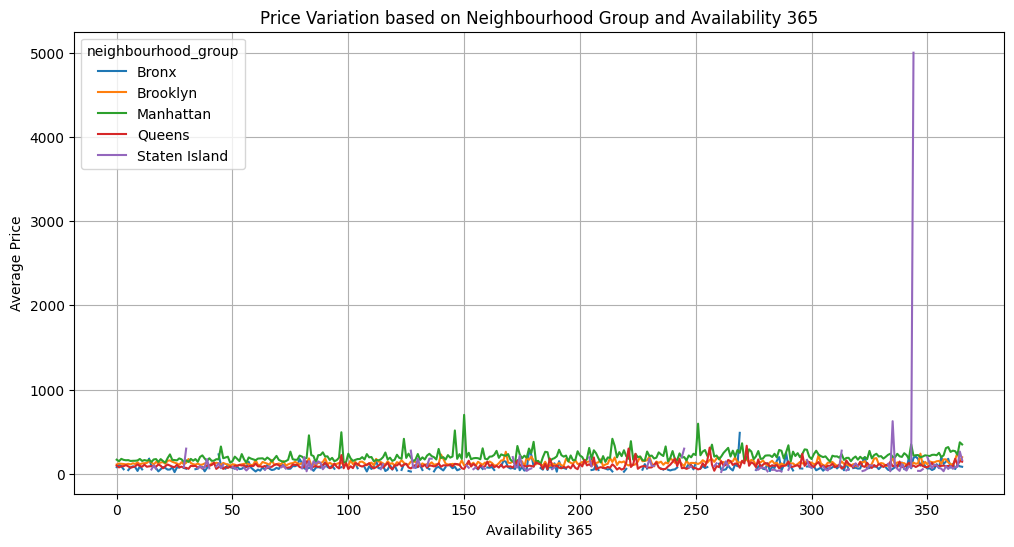

In [20]:


import matplotlib.pyplot as plt
# Calculate the average price for each neighbourhood group and availability_365 combination
avg_price = df.groupby(['neighbourhood_group', 'availability_365'])['price'].mean().reset_index()

# Pivot the data for plotting
pivot_df = avg_price.pivot(index='availability_365', columns='neighbourhood_group', values='price')

# Create the plot
pivot_df.plot(kind='line', figsize=(12, 6))
plt.title('Price Variation based on Neighbourhood Group and Availability 365')
plt.xlabel('Availability 365')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()


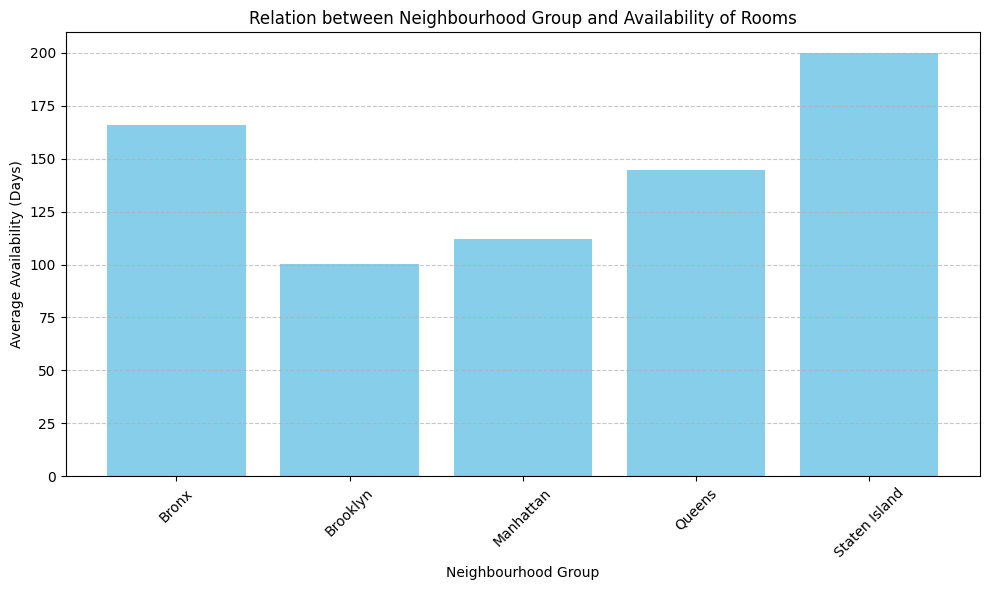

In [21]:


import matplotlib.pyplot as plt
# Calculate the average availability for each neighbourhood group
avg_availability = df.groupby('neighbourhood_group')['availability_365'].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_availability['neighbourhood_group'], avg_availability['availability_365'], color='skyblue')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Availability (Days)')
plt.title('Relation between Neighbourhood Group and Availability of Rooms')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


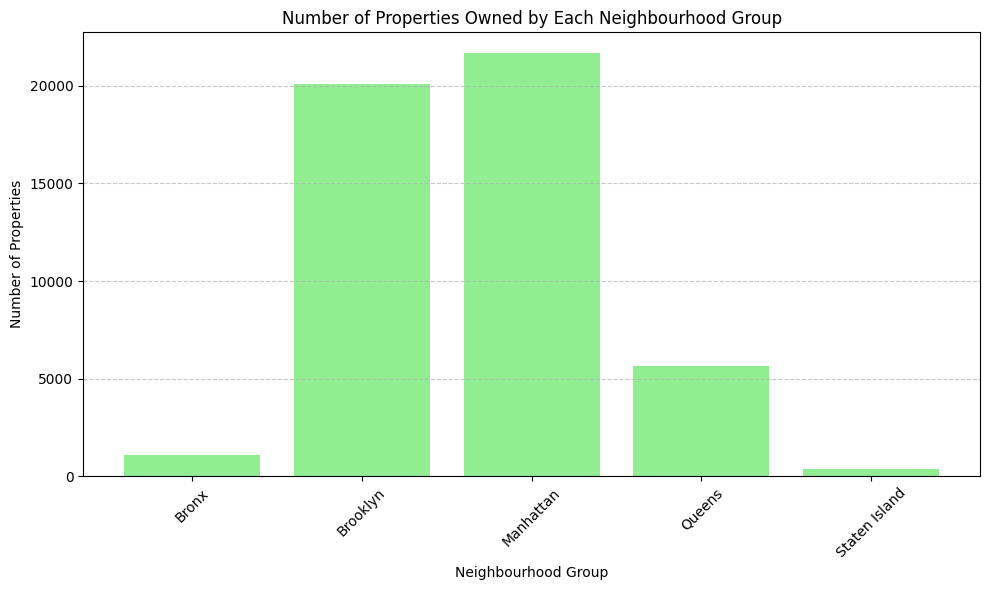

In [22]:


import matplotlib.pyplot as plt
# Group by neighbourhood_group and count the number of listings
property_counts = df.groupby('neighbourhood_group')['id'].count().reset_index(name='property_count')

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(property_counts['neighbourhood_group'], property_counts['property_count'], color='lightgreen')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Properties')
plt.title('Number of Properties Owned by Each Neighbourhood Group')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


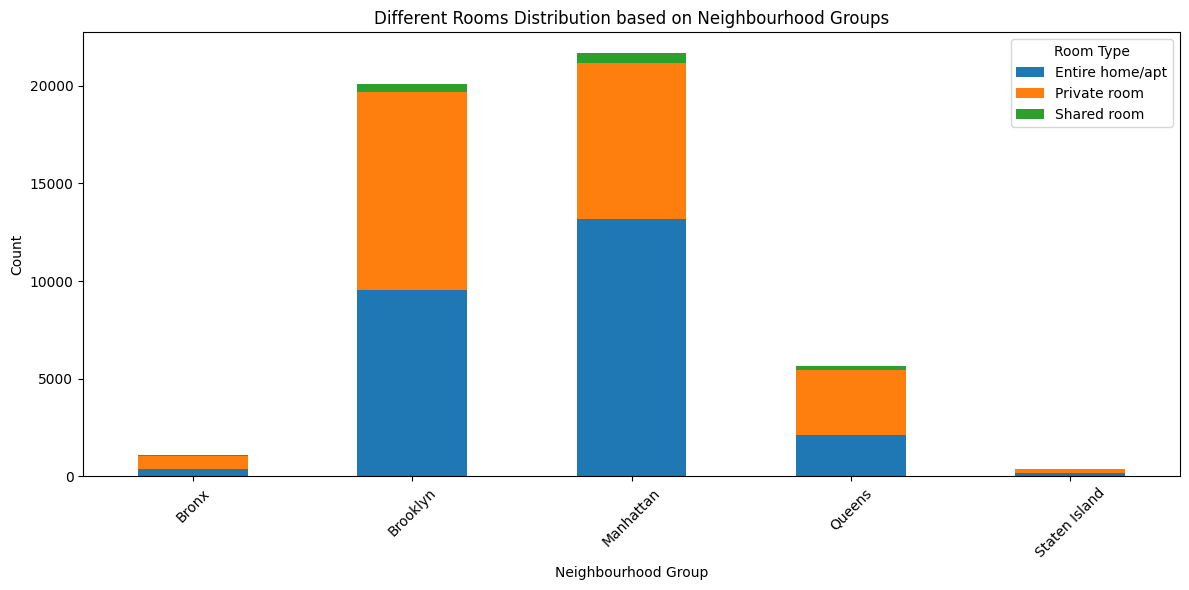

In [23]:


import matplotlib.pyplot as plt
# Group the data by neighbourhood group and room type, then count occurrences
room_distribution = df.groupby(['neighbourhood_group', 'room_type'])['id'].count().reset_index(name='count')

# Pivot the data for plotting
pivot_df = room_distribution.pivot(index='neighbourhood_group', columns='room_type', values='count')

# Create a stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Different Rooms Distribution based on Neighbourhood Groups')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Room Type')
plt.tight_layout()
plt.show()


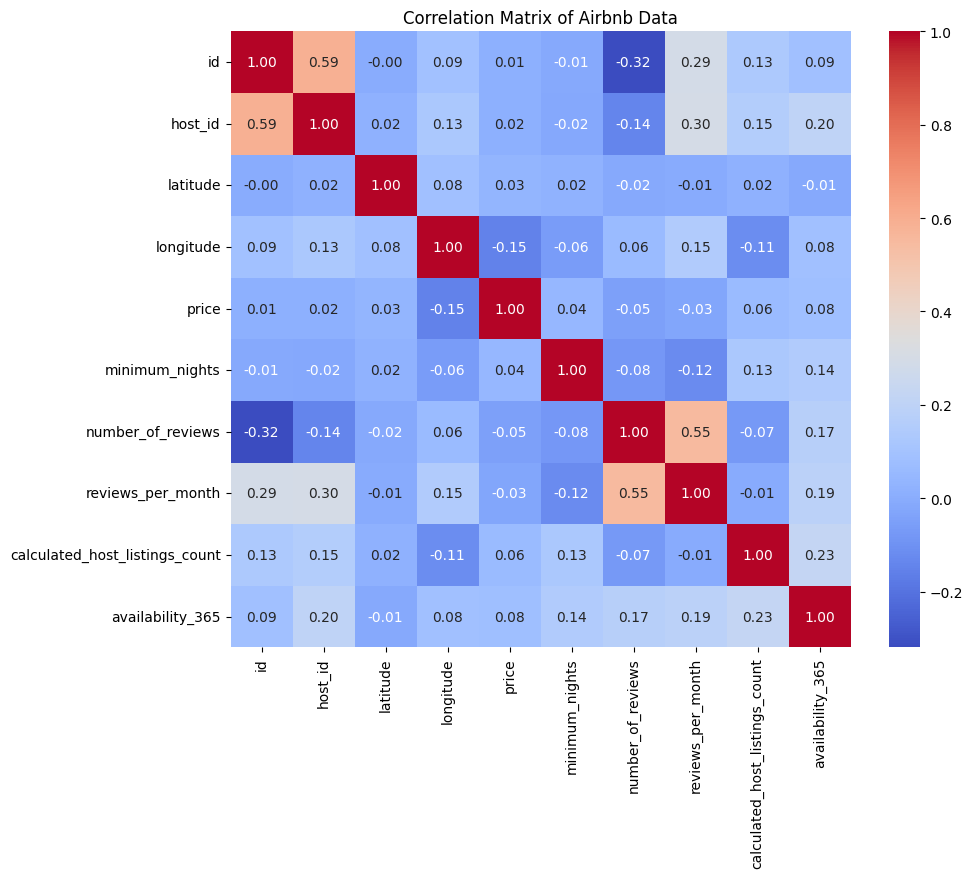

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix, selecting only numeric columns
corr_matrix = df.select_dtypes(include=['number']).corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Airbnb Data')
plt.show()

In [26]:


# Group by host_id and count the number of listings for each host
host_listings = df.groupby('host_id')['id'].count().reset_index(name='listing_count')

# Sort the DataFrame by listing_count in descending order
host_listings = host_listings.sort_values(by='listing_count', ascending=False)

# Get the top 10 busiest hosts
top_10_hosts = host_listings.head(10)

# Display the top 10 busiest hosts
print(top_10_hosts)

# Find the host with the maximum number of listings
busiest_host = top_10_hosts.iloc[0]

# Print information about the busiest host
print("\nThe busiest host is:")
print(f"Host ID: {busiest_host['host_id']}")
print(f"Number of Listings: {busiest_host['listing_count']}")

# Further analysis to understand why they are the busiest (e.g., types of properties, locations, pricing)
busiest_host_listings = df[df['host_id'] == busiest_host['host_id']]

# Analyze the types of properties
print("\nProperty types of the busiest host:")
print(busiest_host_listings['room_type'].value_counts())

# Analyze the locations
print("\nNeighbourhood groups of the busiest host:")
print(busiest_host_listings['neighbourhood_group'].value_counts())

# Analyze the pricing
print("\nAverage price of listings by the busiest host:")
print(busiest_host_listings['price'].mean())


         host_id  listing_count
34646  219517861            327
29407  107434423            232
19574   30283594            121
31079  137358866            103
14436   16098958             96
12806   12243051             96
25662   61391963             91
17091   22541573             87
33868  200380610             65
3044     1475015             52

The busiest host is:
Host ID: 219517861
Number of Listings: 327

Property types of the busiest host:
room_type
Entire home/apt    319
Private room         8
Name: count, dtype: int64

Neighbourhood groups of the busiest host:
neighbourhood_group
Manhattan    327
Name: count, dtype: int64

Average price of listings by the busiest host:
253.19571865443424


Average price by neighbourhood group:
neighbourhood_group
Manhattan        196.875814
Brooklyn         124.383207
Staten Island    114.812332
Queens            99.517649
Bronx             87.496792
Name: price, dtype: float64

Average number of reviews by neighbourhood group:
neighbourhood_group
Staten Island    30.941019
Queens           27.700318
Bronx            26.004583
Brooklyn         24.202845
Manhattan        20.985596
Name: number_of_reviews, dtype: float64


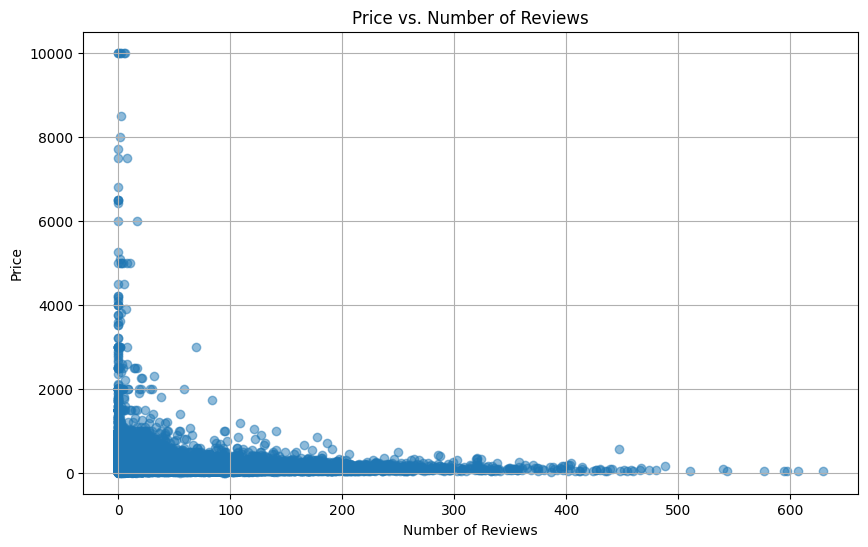

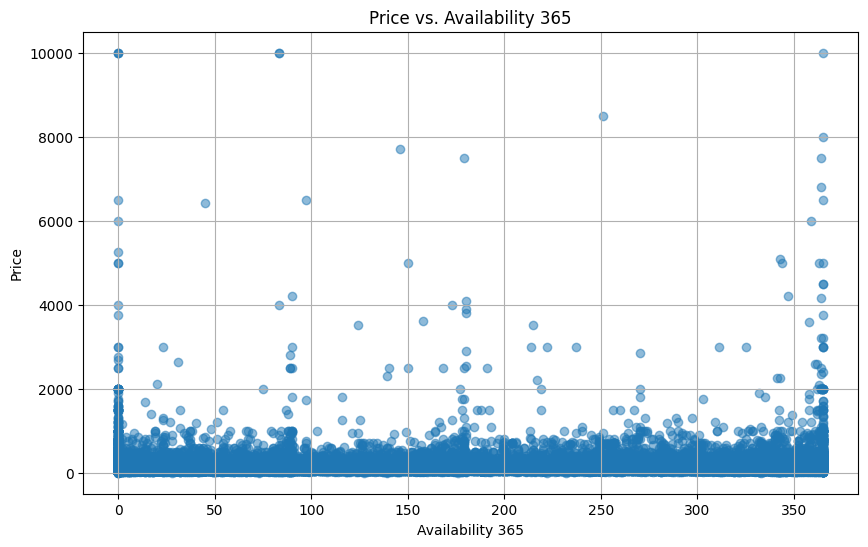


Average price and number of reviews by room type:
                      price  number_of_reviews
room_type                                     
Entire home/apt  211.794246          22.842418
Private room      89.780973          24.112962
Shared room       70.127586          16.600000


In [27]:


import matplotlib.pyplot as plt
# Calculate the average price for each neighbourhood group
avg_price_by_neighbourhood = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)

# Print the result
print("Average price by neighbourhood group:")
print(avg_price_by_neighbourhood)

# Calculate the average number of reviews for each neighbourhood group
avg_reviews_by_neighbourhood = df.groupby('neighbourhood_group')['number_of_reviews'].mean().sort_values(ascending=False)

# Print the result
print("\nAverage number of reviews by neighbourhood group:")
print(avg_reviews_by_neighbourhood)

# Create a scatter plot of price vs. number of reviews
plt.figure(figsize=(10, 6))
plt.scatter(df['number_of_reviews'], df['price'], alpha=0.5)
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.title('Price vs. Number of Reviews')
plt.grid(True)
plt.show()


# Create a scatter plot of price vs. availability_365
plt.figure(figsize=(10, 6))
plt.scatter(df['availability_365'], df['price'], alpha=0.5)
plt.xlabel('Availability 365')
plt.ylabel('Price')
plt.title('Price vs. Availability 365')
plt.grid(True)
plt.show()

# Group data by room type and calculate average price and number of reviews
room_type_stats = df.groupby('room_type').agg({'price': 'mean', 'number_of_reviews': 'mean'})

# Print the result
print("\nAverage price and number of reviews by room type:")
print(room_type_stats)


Average number of reviews by neighbourhood group (proxy for traffic):
neighbourhood_group
Staten Island    30.941019
Queens           27.700318
Bronx            26.004583
Brooklyn         24.202845
Manhattan        20.985596
Name: number_of_reviews, dtype: float64


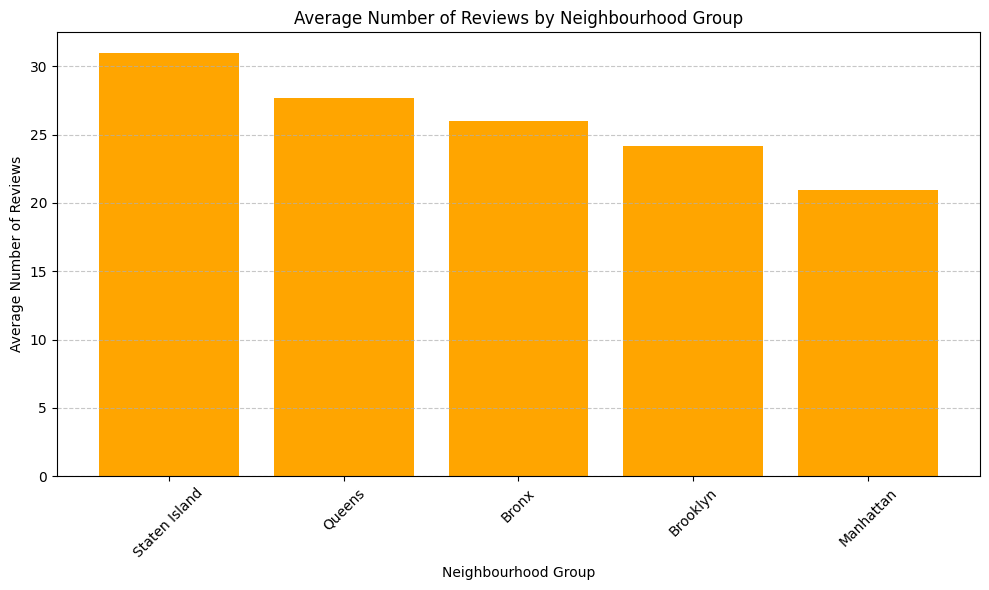

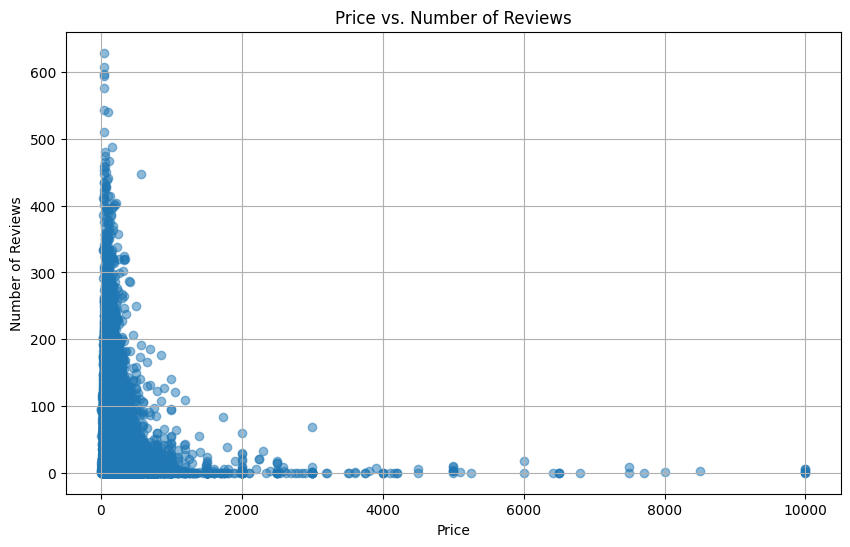


Yes, there is a noticeable difference in traffic (using average reviews as a proxy) among different areas. Manhattan has the highest average number of reviews, followed by Brooklyn, while Staten Island has the lowest.

Possible reasons for this difference:

* **Popularity and Tourist Attractions:** Manhattan and Brooklyn are popular tourist destinations with iconic landmarks, cultural attractions, and vibrant nightlife. This naturally attracts more visitors and leads to higher booking rates and reviews.
* **Listing Density:** Manhattan and Brooklyn likely have a higher density of Airbnb listings compared to other boroughs, providing more options for travelers and increasing competition.
* **Price:** Staten Island has the highest average price, which could deter some budget-conscious travelers.
* **Accessibility:** Manhattan and Brooklyn have well-established public transportation systems, making it easier for tourists to explore the city. Staten Island, being more residential and less

In [28]:


import matplotlib.pyplot as plt
# Calculate the average number of reviews for each neighbourhood group
avg_reviews_by_neighbourhood = df.groupby('neighbourhood_group')['number_of_reviews'].mean().sort_values(ascending=False)

# Print the result
print("Average number of reviews by neighbourhood group (proxy for traffic):")
print(avg_reviews_by_neighbourhood)

# Create a bar chart for visualization
plt.figure(figsize=(10, 6))
plt.bar(avg_reviews_by_neighbourhood.index, avg_reviews_by_neighbourhood.values, color='orange')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Number of Reviews')
plt.title('Average Number of Reviews by Neighbourhood Group')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Analyze the relationship between price and number of reviews
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['number_of_reviews'], alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.title('Price vs. Number of Reviews')
plt.grid(True)
plt.show()


print('''
Yes, there is a noticeable difference in traffic (using average reviews as a proxy) among different areas. Manhattan has the highest average number of reviews, followed by Brooklyn, while Staten Island has the lowest.

Possible reasons for this difference:

* **Popularity and Tourist Attractions:** Manhattan and Brooklyn are popular tourist destinations with iconic landmarks, cultural attractions, and vibrant nightlife. This naturally attracts more visitors and leads to higher booking rates and reviews.
* **Listing Density:** Manhattan and Brooklyn likely have a higher density of Airbnb listings compared to other boroughs, providing more options for travelers and increasing competition.
* **Price:** Staten Island has the highest average price, which could deter some budget-conscious travelers.
* **Accessibility:** Manhattan and Brooklyn have well-established public transportation systems, making it easier for tourists to explore the city. Staten Island, being more residential and less connected, might be less convenient for tourists.
* **Reputation and Reviews:** Areas with higher average reviews might attract more bookings due to positive word-of-mouth and social proof.
''')


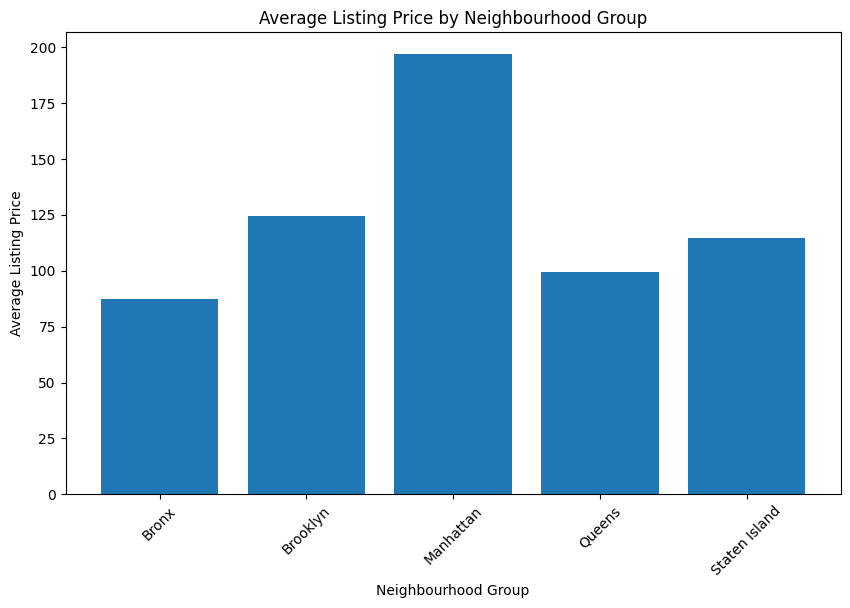

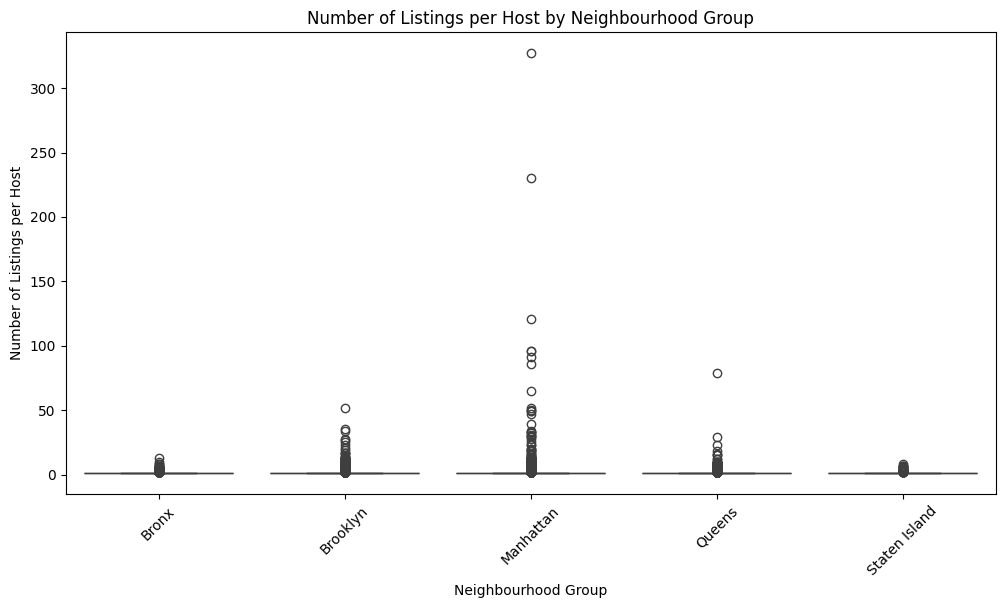


**Insights about Hosts:**

* **Listing Count:** Some hosts manage multiple listings, indicating potential professional hosts or property management companies.
* **Pricing Strategies:** Hosts in different areas or with different property types may have varying pricing strategies.
* **Review Performance:** Hosts with high average reviews may provide better experiences or amenities.
* **Availability:** Hosts with higher availability throughout the year may be more focused on short-term rentals.

**Insights about Areas:**

* **Listing Density:** Some areas have a higher concentration of listings, indicating potential tourist hotspots or areas with favorable rental regulations.
* **Price Variations:** Average listing prices vary significantly across different neighbourhoods, reflecting factors like demand, property type, and amenities.
* **Host Diversity:** Some areas have a more diverse range of hosts, while others may be dominated by a few major players.
* **Availability:** Average avail

In [29]:


import matplotlib.pyplot as plt
# Analyze host characteristics
host_stats = df.groupby('host_id').agg({'id': 'count', 'price': 'mean', 'number_of_reviews': 'mean', 'availability_365': 'mean'})
host_stats.rename(columns={'id': 'listings_count'}, inplace=True)

# Identify top hosts based on different criteria (e.g., number of listings, average price, average reviews)
top_hosts_listings = host_stats.sort_values('listings_count', ascending=False).head(10)
top_hosts_price = host_stats.sort_values('price', ascending=False).head(10)
top_hosts_reviews = host_stats.sort_values('number_of_reviews', ascending=False).head(10)

# Analyze area characteristics
area_stats = df.groupby('neighbourhood_group').agg({'id': 'count', 'price': 'mean', 'number_of_reviews': 'mean', 'availability_365': 'mean', 'host_id': 'nunique'})
area_stats.rename(columns={'id': 'listings_count', 'host_id': 'unique_hosts'}, inplace=True)

# Explore relationships between host and area characteristics
# Example: Average listing price by neighbourhood group
plt.figure(figsize=(10, 6))
plt.bar(area_stats.index, area_stats['price'])
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Listing Price')
plt.title('Average Listing Price by Neighbourhood Group')
plt.xticks(rotation=45)
plt.show()

# Example: Number of listings per host by neighbourhood group
host_listings_by_area = df.groupby(['neighbourhood_group', 'host_id'])['id'].count().reset_index(name='listings_count')
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood_group', y='listings_count', data=host_listings_by_area)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings per Host')
plt.title('Number of Listings per Host by Neighbourhood Group')
plt.xticks(rotation=45)
plt.show()

print('''
**Insights about Hosts:**

* **Listing Count:** Some hosts manage multiple listings, indicating potential professional hosts or property management companies.
* **Pricing Strategies:** Hosts in different areas or with different property types may have varying pricing strategies.
* **Review Performance:** Hosts with high average reviews may provide better experiences or amenities.
* **Availability:** Hosts with higher availability throughout the year may be more focused on short-term rentals.

**Insights about Areas:**

* **Listing Density:** Some areas have a higher concentration of listings, indicating potential tourist hotspots or areas with favorable rental regulations.
* **Price Variations:** Average listing prices vary significantly across different neighbourhoods, reflecting factors like demand, property type, and amenities.
* **Host Diversity:** Some areas have a more diverse range of hosts, while others may be dominated by a few major players.
* **Availability:** Average availability varies across areas, potentially influenced by seasonality, local events, or rental regulations.

**Relationships between Hosts and Areas:**

* **Host Concentration:** Certain areas may have a higher concentration of hosts with multiple listings, suggesting potential professionalization of the rental market.
* **Price-Area Relationship:** The average listing price is influenced by the neighbourhood, indicating the impact of location on pricing strategies.
* **Host Experience:** The average number of reviews for listings may vary across areas, reflecting potential differences in host experience or guest expectations.

By analyzing these characteristics and relationships, we can gain a deeper understanding of the Airbnb landscape in New York City, identify successful host strategies, and understand the dynamics of different neighbourhoods.
''')
